# Importing Libraries

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import base64
import numpy as np
import os
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
import nltk
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import  MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
import pickle
from sklearn.svm import SVC
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB

In [31]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import  MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.models import Sequential

# Importing Dataset

In [40]:
df = pd.read_excel('Dataset.xlsx')

# EDA

In [41]:
df.head()

,Source,Target_Processed
0,Acne,"['mild', 'moderate', 'acne', 'spot']"
1,Acne,"['ret', 'prescription', 'medicine', 'reduce', ..."
2,Acne,"['treat', 'acne', 'vulgaris', 'people', 'year'..."
3,Acne,"['white', 'head', 'pimple']"
4,Acne,"['treat', 'acne', 'vulgaris', 'people', 'year'..."


In [43]:

# df = pd.DataFrame(data)

# Get the column names
columns = df.columns

# Look for the column containing 'Target'
target_column = [col for col in columns if 'Target_Processed' in col]

if target_column:
    # Remove brackets, commas, and quotation marks
    df[target_column[0]] = df[target_column[0]].str.replace("[", "").str.replace("]", "").str.replace("'", "").str.replace(",", "")


# df['Target_Processed'] = df['Target_Processed'].str.replace("[", "").str.replace("]", "").str.replace("'", "").str.replace(",", "")
df.head()

,Source,Target_Processed
0,Acne,mild moderate acne spot
1,Acne,ret prescription medicine reduce fine wrinkle
2,Acne,treat acne vulgaris people year age old acne v...
3,Acne,white head pimple
4,Acne,treat acne vulgaris people year age old acne v...


In [45]:
dataset= df

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34346 entries, 0 to 34345
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Source            34346 non-null  object
 1   Target_Processed  34346 non-null  object
dtypes: object(2)
memory usage: 536.8+ KB


In [47]:
dataset.isnull().sum()

Source              0
Target_Processed    0
dtype: int64

In [48]:
dataset.describe()

,Source,Target_Processed
count,34346,34346
unique,51,426
top,Pain,physical exercise weight reduction able contro...
freq,7708,671


# Data Visualization

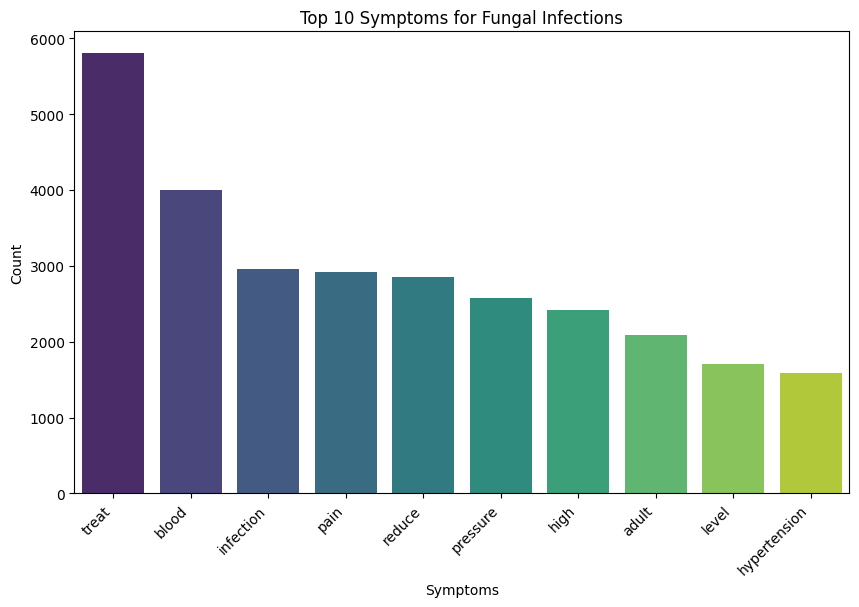

In [50]:
symptom_counts = dataset['Target_Processed'].str.split().explode().value_counts()


top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x=symptom_counts.head(top_n).index, y=symptom_counts.head(top_n).values, palette="viridis")
plt.title('Top {} Symptoms for Fungal Infections'.format(top_n))
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Text Cleaning

In [51]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def cleanData(doc):
    tokens = doc.split()
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = ' '.join(tokens)
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
labels = dataset['Source'].unique().tolist()
symptoms = dataset.Target_Processed
diseases = dataset.Source
Y = []
for i in range(len(diseases)):
    index = labels.index(diseases[i])
    Y.append(index)

In [54]:
import nltk
nltk.download('wordnet')
X = []
for i in range(len(symptoms)):
    arr = symptoms[i]
    arr = arr.strip().lower()
    arr = arr.replace("_", " ")
    X.append(cleanData(arr))

[nltk_data] Downloading package wordnet to /root/nltk_data...


# Tokenization

In [58]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS as stopwords

# Assuming you have defined your X and Y variables already

# Convert the frozenset of stopwords to a list
stopwords_list = list(stopwords)

# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords_list, use_idf=True, smooth_idf=False, norm=None, decode_error='replace')

# Fit the vectorizer and transform the text data
tfidf = tfidf_vectorizer.fit_transform(X).toarray()

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame with the tfidf values and feature names
df = pd.DataFrame(tfidf, columns=feature_names)

# Assuming you have defined your X and Y variables already
X = df
y = Y


In [59]:
y = Y
Y = np.asarray(Y)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

# Random Forest

In [61]:
RF = RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(X_train, Y_train)
predictions = RF.predict(X_test)
val = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for Random Forest: ", val, "\n")
print("*Confusion Matrix for Random Forest: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for Random Forest: ")
print(classification_report(Y_test, predictions))

*Accuracy score for Random Forest:  36.346433770014556 

*Confusion Matrix for Random Forest: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
*Classification Report for Random Forest: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00       175
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        86
           6       0.00      0.00      0.00        70
           7       0.00      0.00      0.00       130
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        41
          11       0.00      0.00      0.00        11
          12       0.00      0.00      

In [62]:
acc = accuracy_score(Y_test, predictions) * 100
p = precision_score(Y_test, predictions,average='macro') * 100
r = recall_score(Y_test, predictions,average='macro') * 100
f = f1_score(Y_test, predictions,average='macro') * 100



print("Accuracy: {:.2f}%".format(acc))
print("Precision: {:.2f}%".format(p))
print("Recall: {:.2f}%".format(r))
print("F1-score: {:.2f}%".format(f))

Accuracy: 36.35%
Precision: 6.52%
Recall: 5.27%
F1-score: 4.75%


# KNN

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
val = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for  KNN: ", val, "\n")
print("*Confusion Matrix for  KNN: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(Y_test, predictions))

*Accuracy score for  KNN:  96.85589519650655 

*Confusion Matrix for  KNN: 
[[ 89   0   0 ...   0   0   0]
 [  4   0   0 ...   0   0   0]
 [  4   0 169 ...   0   0   0]
 ...
 [  0   0   0 ...  30   3   0]
 [  0   0   0 ...   9  71   0]
 [  0   0   0 ...   0   0  14]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        89
           1       0.00      0.00      0.00         4
           2       1.00      0.97      0.98       175
           3       1.00      0.95      0.98        43
           4       1.00      0.82      0.90        11
           5       0.85      1.00      0.92        86
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00       130
           8       1.00      0.91      0.95        32
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        41
          11       1.00      1.00      1.00       

In [64]:
acc1 = accuracy_score(Y_test, predictions) * 100
p1 = precision_score(Y_test, predictions,average='macro') * 100
r1 = recall_score(Y_test, predictions,average='macro') * 100
f1 = f1_score(Y_test, predictions,average='macro') * 100



print("Accuracy: {:.2f}%".format(acc1))
print("Precision: {:.2f}%".format(p1))
print("Recall: {:.2f}%".format(r1))
print("F1-score: {:.2f}%".format(f1))

Accuracy: 96.86%
Precision: 92.94%
Recall: 91.28%
F1-score: 91.71%


# SVM

In [65]:
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_test)
val = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for  svm: ", val, "\n")
print("*Confusion Matrix for  svm: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for svm: ")
print(classification_report(Y_test, predictions))

*Accuracy score for  svm:  96.40465793304222 

*Confusion Matrix for  svm: 
[[ 87   0   0 ...   0   0   0]
 [  4   0   0 ...   0   0   0]
 [  4   0 169 ...   0   0   0]
 ...
 [  0   0   0 ...  26   7   0]
 [  0   0   0 ...   5  75   0]
 [  0   0   0 ...   0   0  14]]
*Classification Report for svm: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        89
           1       0.00      0.00      0.00         4
           2       1.00      0.97      0.98       175
           3       1.00      0.91      0.95        43
           4       1.00      0.64      0.78        11
           5       0.85      1.00      0.92        86
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00       130
           8       1.00      0.91      0.95        32
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        41
          11       1.00      1.00      1.00       

In [66]:
acc2 = accuracy_score(Y_test, predictions) * 100
p2 = precision_score(Y_test, predictions,average='macro') * 100
r2 = recall_score(Y_test, predictions,average='macro') * 100
f2 = f1_score(Y_test, predictions,average='macro') * 100



print("Accuracy: {:.2f}%".format(acc2))
print("Precision: {:.2f}%".format(p2))
print("Recall: {:.2f}%".format(r2))
print("F1-score: {:.2f}%".format(f2))

Accuracy: 96.40%
Precision: 91.51%
Recall: 88.97%
F1-score: 89.62%


# Gradient Boosting

In [67]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GB.fit(X_train, Y_train)
predictions = GB.predict(X_test)
val = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for  GB: ", val, "\n")
print("*Confusion Matrix for  GB: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for GB: ")
print(classification_report(Y_test, predictions))

*Accuracy score for  GB:  4.294032023289665 

*Confusion Matrix for  GB: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]]
*Classification Report for GB: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00       175
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        86
           6       0.00      0.00      0.00        70
           7       0.00      0.00      0.00       130
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        41
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        68
          13     

In [68]:
acc3 = accuracy_score(Y_test, predictions) * 100
p3 = precision_score(Y_test, predictions,average='macro') * 100
r3 = recall_score(Y_test, predictions,average='macro') * 100
f3 = f1_score(Y_test, predictions,average='macro') * 100



print("Accuracy: {:.2f}%".format(acc3))
print("Precision: {:.2f}%".format(p3))
print("Recall: {:.2f}%".format(r3))
print("F1-score: {:.2f}%".format(f3))

Accuracy: 4.29%
Precision: 2.58%
Recall: 1.32%
F1-score: 0.63%


# Voting Classifier

In [69]:
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = SVC()

eclf1 = VotingClassifier(estimators=[('knn', clf1), ('svc', clf2)], voting='hard')

eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
val = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for  Voting Classifier: ", val, "\n")
print("*Confusion Matrix for  Voting Classifier: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for Voting Classifier: ")
print(classification_report(Y_test, predictions))

*Accuracy score for  Voting Classifier:  96.98689956331877 

*Confusion Matrix for  Voting Classifier: 
[[ 89   0   0 ...   0   0   0]
 [  4   0   0 ...   0   0   0]
 [  4   0 169 ...   0   0   0]
 ...
 [  0   0   0 ...  30   3   0]
 [  0   0   0 ...   9  71   0]
 [  0   0   0 ...   0   0  14]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        89
           1       0.00      0.00      0.00         4
           2       1.00      0.97      0.98       175
           3       1.00      0.95      0.98        43
           4       1.00      0.82      0.90        11
           5       0.85      1.00      0.92        86
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00       130
           8       1.00      0.91      0.95        32
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        41
        

In [70]:
acc4 = accuracy_score(Y_test, predictions) * 100
p4 = precision_score(Y_test, predictions,average='macro') * 100
r4 = recall_score(Y_test, predictions,average='macro') * 100
f4 = f1_score(Y_test, predictions,average='macro') * 100



print("Accuracy: {:.2f}%".format(acc4))
print("Precision: {:.2f}%".format(p4))
print("Recall: {:.2f}%".format(r4))
print("F1-score: {:.2f}%".format(f4))

Accuracy: 96.99%
Precision: 93.35%
Recall: 92.37%
F1-score: 92.61%


# CNN

In [71]:
Y = np.asarray(Y)
print(Y)
X = X.values
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
a = X
b = Y
X1 = a[indices]
Y1 = b[indices]
X = X[indices]
Y = Y[indices]
Y = to_categorical(Y)
X = X.reshape(X.shape[0],X.shape[1],1,1)

[ 0  0  0 ... 50 50 50]


In [72]:
classifier = Sequential()
classifier.add(Convolution2D(32, 1, 1, input_shape = (X.shape[1], X.shape[2], X.shape[3]), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (1, 1)))
classifier.add(Convolution2D(32, 1, 1, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (1, 1)))
classifier.add(Flatten())
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(Y.shape[1], activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = classifier.fit(X, Y, batch_size=8, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
4294/4294 - 22s - loss: 0.1647 - accuracy: 0.9543 - 22s/epoch - 5ms/step
Epoch 2/10
4294/4294 - 18s - loss: 0.0805 - accuracy: 0.9679 - 18s/epoch - 4ms/step
Epoch 3/10
4294/4294 - 17s - loss: 0.0766 - accuracy: 0.9694 - 17s/epoch - 4ms/step
Epoch 4/10
4294/4294 - 17s - loss: 0.0737 - accuracy: 0.9688 - 17s/epoch - 4ms/step
Epoch 5/10
4294/4294 - 18s - loss: 0.0727 - accuracy: 0.9691 - 18s/epoch - 4ms/step
Epoch 6/10
4294/4294 - 17s - loss: 0.0723 - accuracy: 0.9696 - 17s/epoch - 4ms/step
Epoch 7/10
4294/4294 - 18s - loss: 0.0705 - accuracy: 0.9690 - 18s/epoch - 4ms/step
Epoch 8/10
4294/4294 - 17s - loss: 0.0713 - accuracy: 0.9695 - 17s/epoch - 4ms/step
Epoch 9/10
4294/4294 - 18s - loss: 0.0702 - accuracy: 0.9705 - 18s/epoch - 4ms/step
Epoch 10/10
4294/4294 - 17s - loss: 0.0691 - accuracy: 0.9704 - 17s/epoch - 4ms/step


In [73]:
classifier.save('model.h5')

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

predict = classifier.predict(X_test)
predict = np.argmax(predict, axis=1)
testY = np.argmax(y_test, axis=1)

p5 = precision_score(testY, predict,average='macro') * 100
r5 = recall_score(testY, predict,average='macro') * 100
f5 = f1_score(testY, predict,average='macro') * 100
acc5 = accuracy_score(testY,predict)*100

print("Accuracy: {:.2f}%".format(acc5))
print("Precision: {:.2f}%".format(p5))
print("Recall: {:.2f}%".format(r5))
print("F1-score: {:.2f}%".format(f5))



215/215 [==============================] - 1s 2ms/step
Accuracy: 97.39%
Precision: 93.17%
Recall: 93.05%
F1-score: 92.84%


# Comparison

In [75]:
results = {
    'Accuracy': [acc, acc1, acc2, acc3, acc4, acc5],
    'Recall': [r, r1, r2, r3, r4, r5],
    'Precision': [p, p1, p2, p3, p4, p5],
    'F1': [f, f1, f2, f3, f4, f5]
}

index = ['Random Forest','KNN','SVM','Gradient Boosting','Voting Classifier',' CNN']

In [76]:
results =pd.DataFrame(results,index=index)
print(results)

                    Accuracy     Recall  Precision         F1
Random Forest      36.346434   5.266961   6.521386   4.751617
KNN                96.855895  91.276619  92.942175  91.712514
SVM                96.404658  88.967304  91.509792  89.616422
Gradient Boosting   4.294032   1.323778   2.584737   0.634289
Voting Classifier  96.986900  92.374262  93.348842  92.606090
 CNN               97.394469  93.050901  93.170781  92.836348


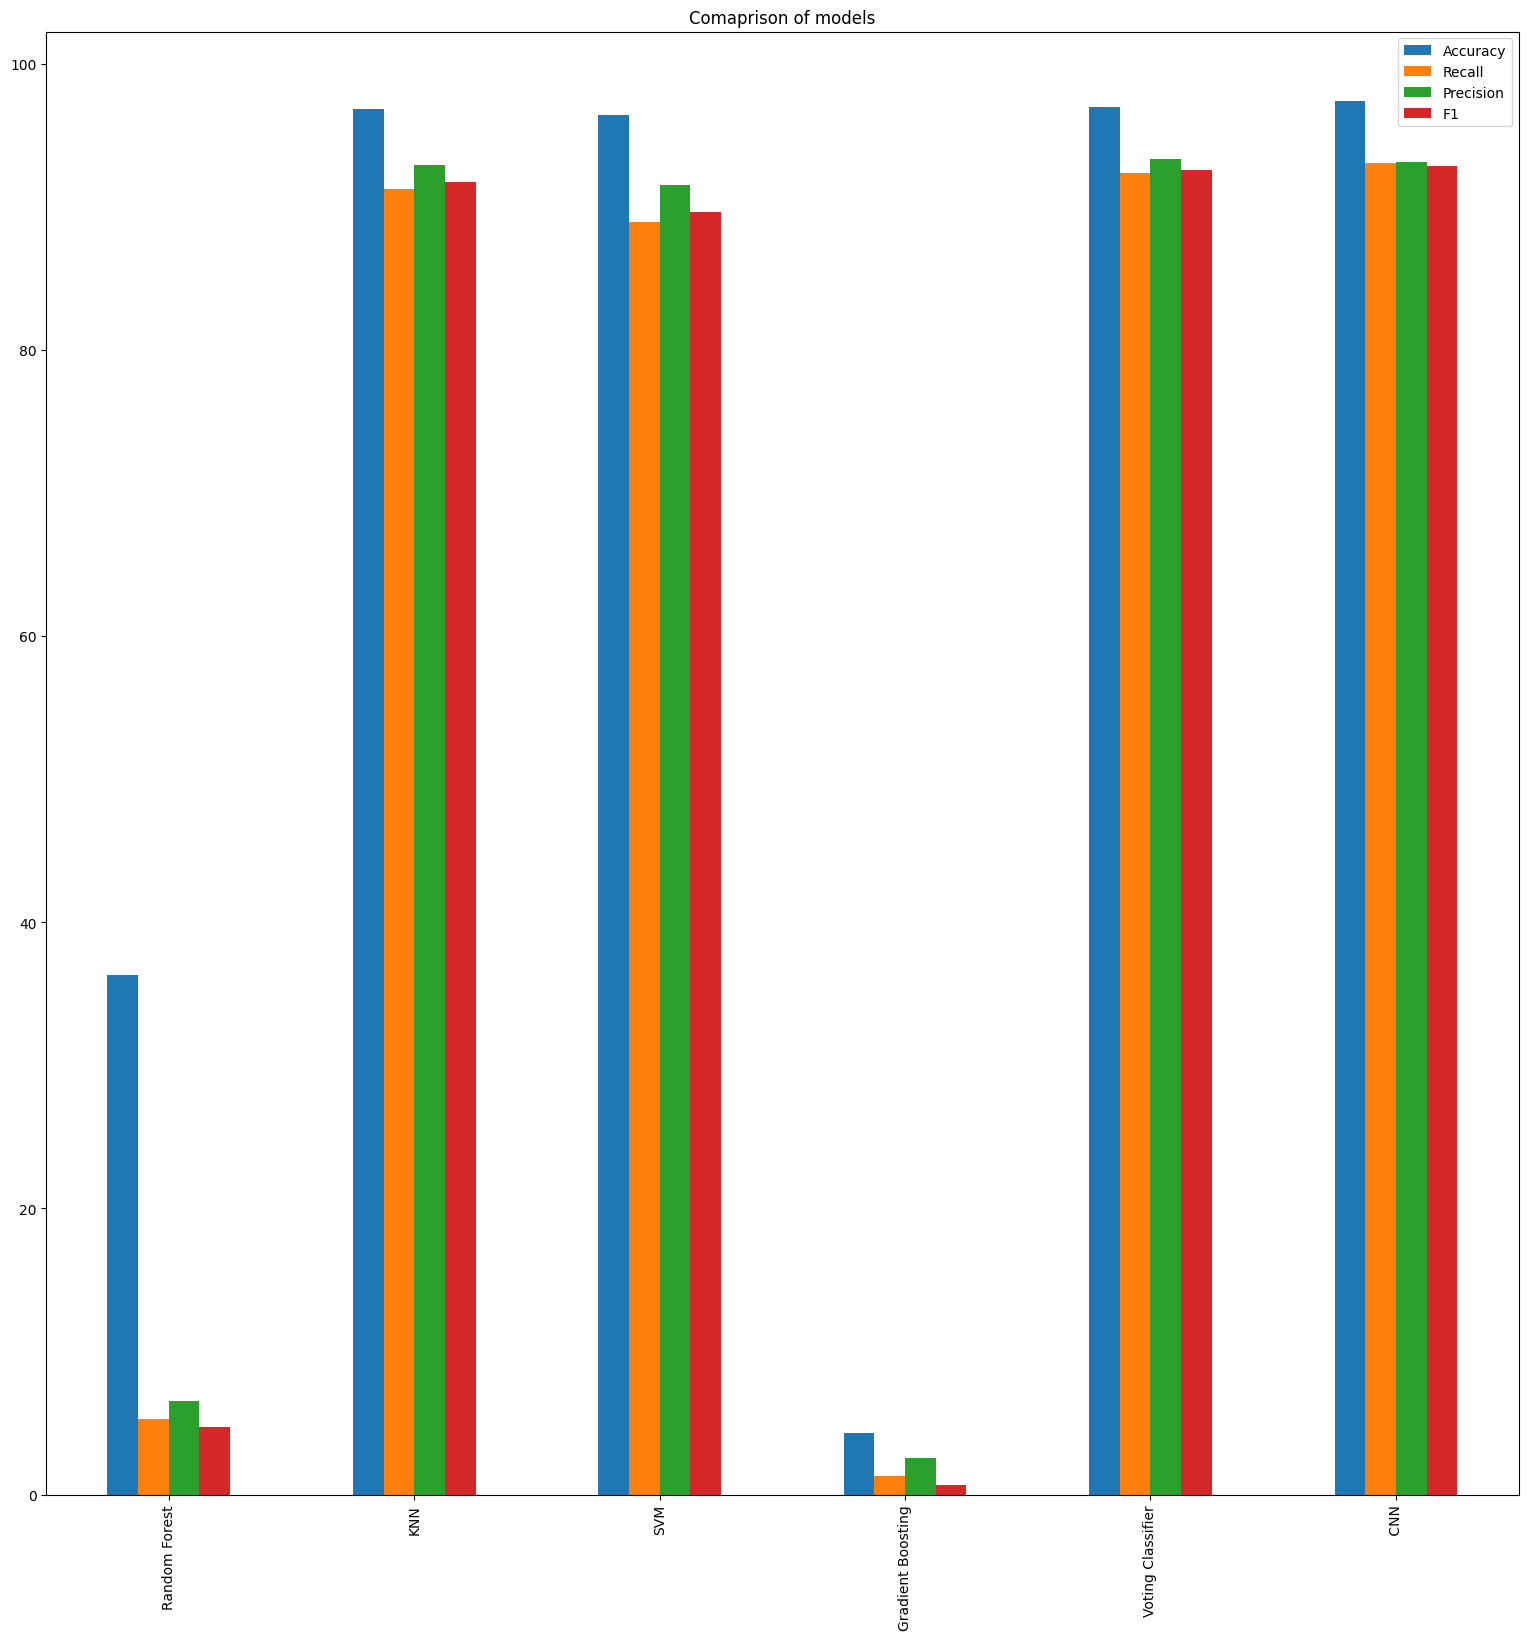

In [77]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

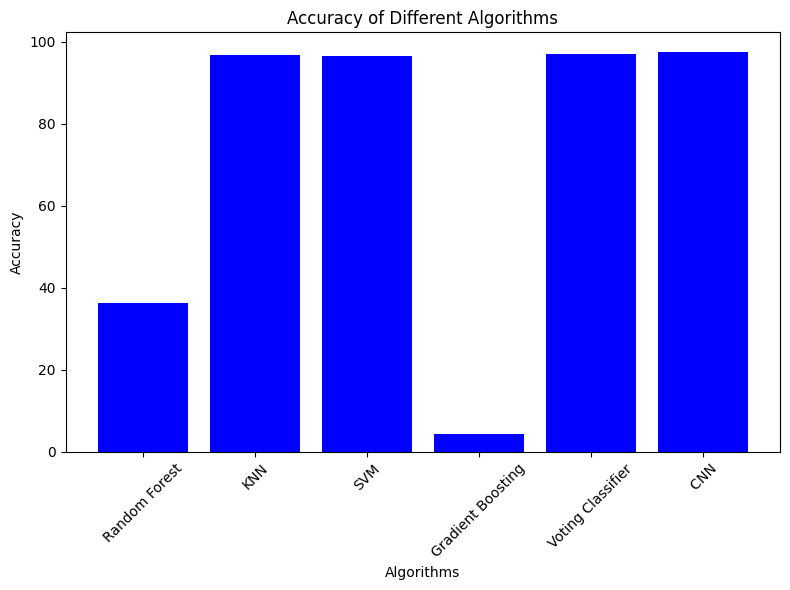

In [78]:
accuracy_values = results['Accuracy']
accuracy_df = pd.DataFrame({'Algorithms': index, 'Accuracy': accuracy_values})

plt.figure(figsize=(8, 6))
plt.bar(accuracy_df['Algorithms'], accuracy_df['Accuracy'], color='blue')
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

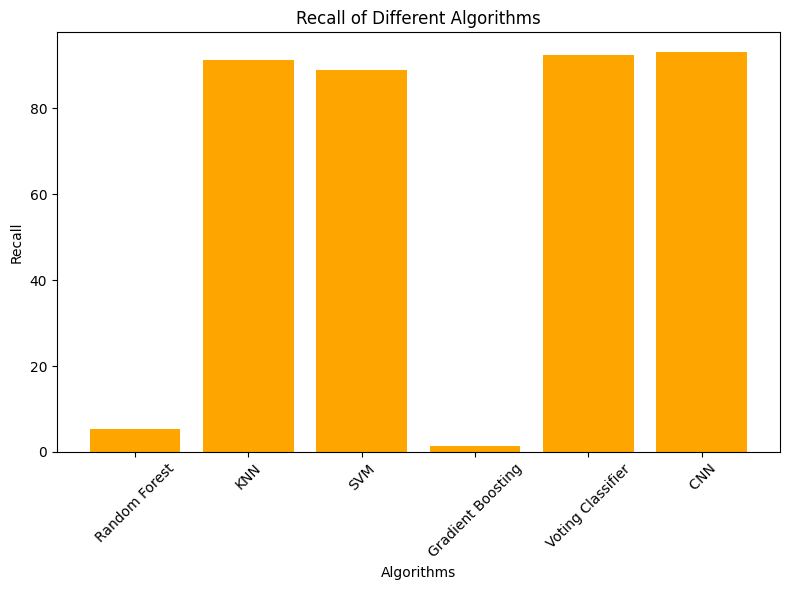

In [79]:
recall_values = results['Recall']
recall_df = pd.DataFrame({'Algorithms': index, 'Recall': recall_values})

plt.figure(figsize=(8, 6))
plt.bar(recall_df['Algorithms'], recall_df['Recall'], color='orange')
plt.title('Recall of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

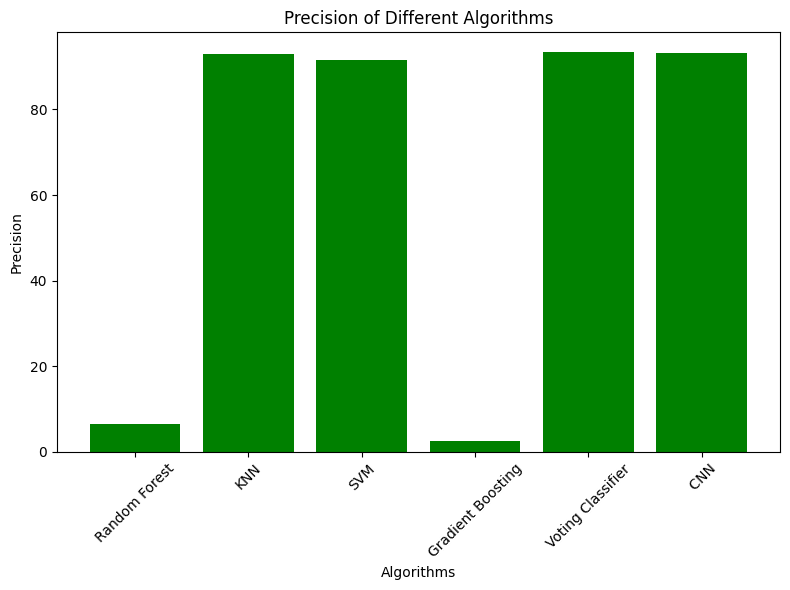

In [80]:
precision_values = results['Precision']
precision_df = pd.DataFrame({'Algorithms': index, 'Precision': precision_values})

plt.figure(figsize=(8, 6))
plt.bar(precision_df['Algorithms'], precision_df['Precision'], color='green')
plt.title('Precision of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

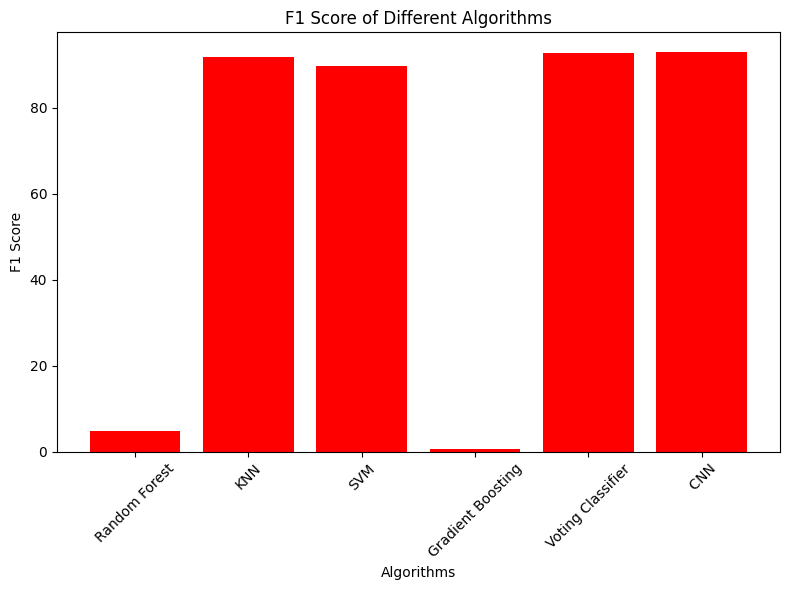

In [81]:
f1_values = results['F1']
f1_df = pd.DataFrame({'Algorithms': index, 'F1 Score': f1_values})

plt.figure(figsize=(8, 6))
plt.bar(f1_df['Algorithms'], f1_df['F1 Score'], color='red')
plt.title('F1 Score of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
# Get the size of the dataset
dataset_size = dataset.shape[0]
print("Size of the dataset:", dataset_size)

# Get the composition of the dataset by target class
composition = dataset['Source'].value_counts()
print("\nComposition of the dataset by target class:")
print(composition)


Size of the dataset: 34346

Composition of the dataset by target class:
Source
Pain                 7708
Supplement           5693
Infection            4015
Diabetes             2684
Hypertension         2505
Fungal               1157
Schizophrenia         964
Allergies             872
Fever                 637
Anxiety               632
Depression            628
Acne                  494
Psychosis             493
Anaemia               490
Constipation          354
Viral                 354
Diarrhoea             346
Angina                327
General               317
Hypnosis              258
Digestion             255
Malarial              228
Glaucoma              224
Alzheimer             201
Hyperpigmentation     194
Arthritis             193
Gout                  178
Vaccines              167
Contraception         166
Vertigo               141
Osteoporosis          141
Pyrexia               141
Appetite              139
Thrombolysis          124
Migraine              113
Haemorrhoid

In [83]:

# Define the data for the table
data = {
    'Model': ['Random Forest', 'KNN', 'SVM', 'Gradient Boosting', 'Voting Classifier', 'CNN'],
    'Training dataset accuracy (%)': [acc, acc1, acc2, acc3, acc4, acc5],  # These variables should hold the accuracy values
    'Validation accuracy (%)': ['Fill your validation accuracy', 'Fill your validation accuracy', 'Fill your validation accuracy', 'Fill your validation accuracy', 'Fill your validation accuracy', 'Fill your validation accuracy'],  # You need to replace these with actual validation accuracy values
    'Computation time': ['Fill your computation time', 'Fill your computation time', 'Fill your computation time', 'Fill your computation time', 'Fill your computation time', 'Fill your computation time']  # You need to replace these with actual computation time values
}

# Create DataFrame
result_df = pd.DataFrame(data)

# Display the DataFrame
print("Table 4: Result Analysis")
print(result_df)

Table 4: Result Analysis
               Model  Training dataset accuracy (%)  \
0      Random Forest                      36.346434   
1                KNN                      96.855895   
2                SVM                      96.404658   
3  Gradient Boosting                       4.294032   
4  Voting Classifier                      96.986900   
5                CNN                      97.394469   

         Validation accuracy (%)            Computation time  
0  Fill your validation accuracy  Fill your computation time  
1  Fill your validation accuracy  Fill your computation time  
2  Fill your validation accuracy  Fill your computation time  
3  Fill your validation accuracy  Fill your computation time  
4  Fill your validation accuracy  Fill your computation time  
5  Fill your validation accuracy  Fill your computation time  


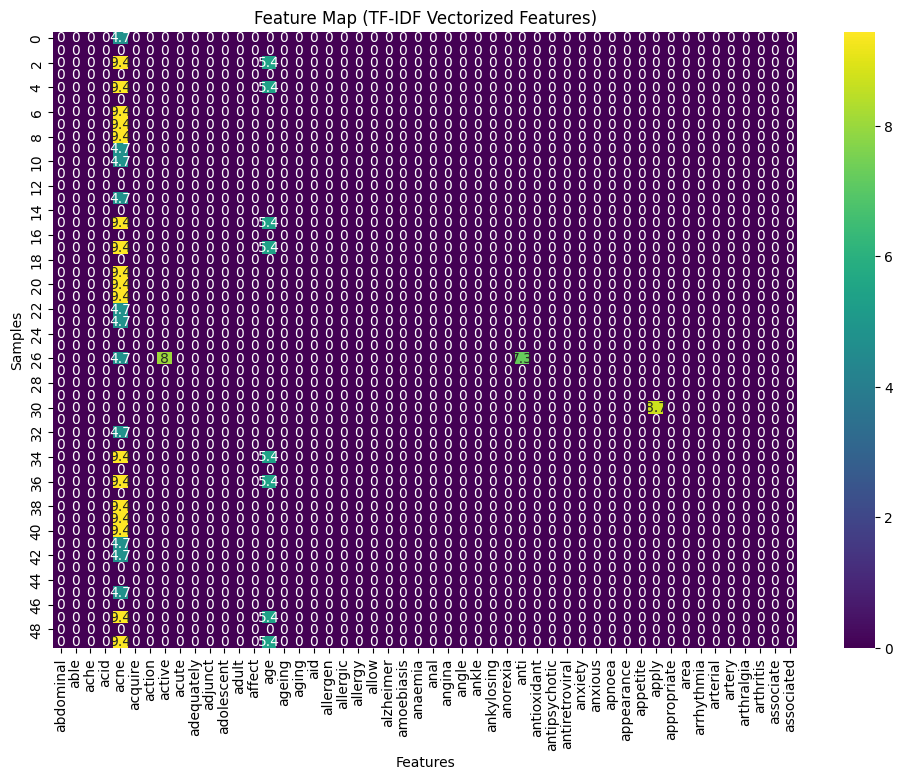

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the feature map
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:50, :50], annot=True, cmap='viridis')  # Adjust the range [:10, :10] according to your preference
plt.title('Feature Map (TF-IDF Vectorized Features)')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()


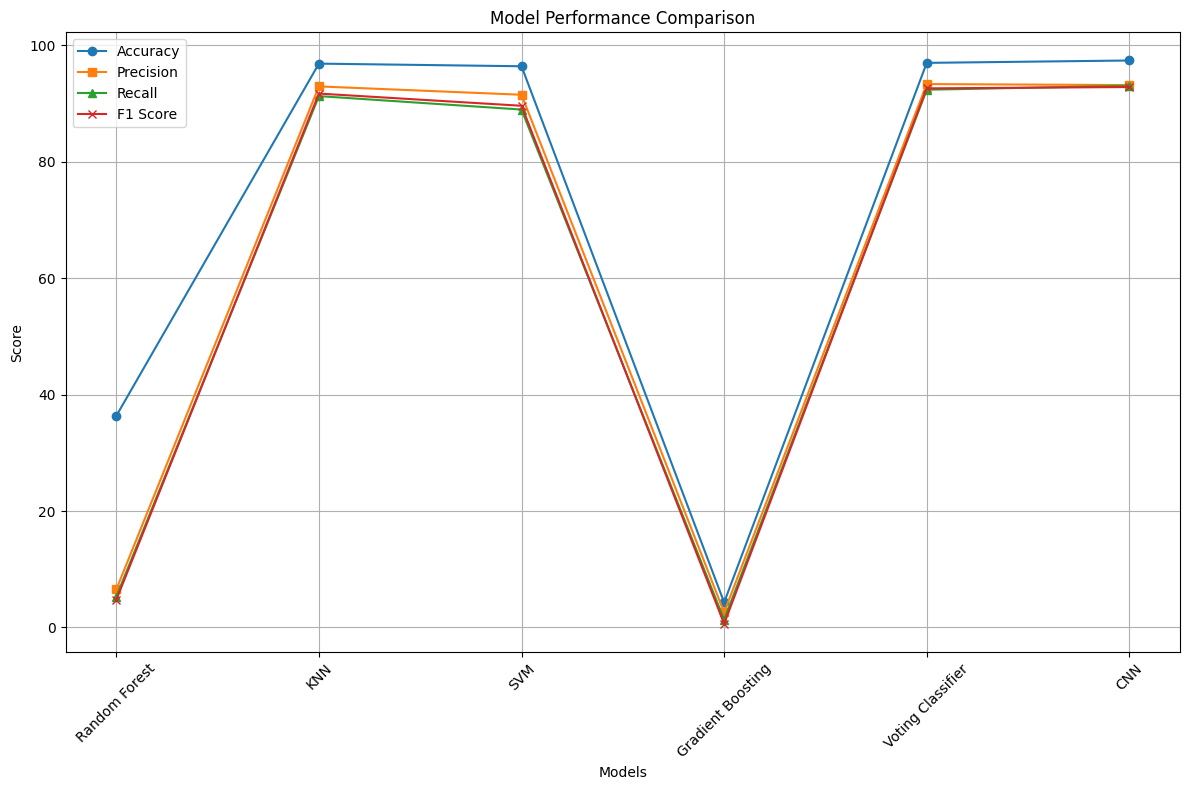

In [86]:
import matplotlib.pyplot as plt

# Model names
models = ['Random Forest', 'KNN', 'SVM', 'Gradient Boosting', 'Voting Classifier', 'CNN']

# Accuracy scores for each model
accuracy_scores = [acc, acc1, acc2, acc3, acc4, acc5]

# Precision scores for each model
precision_scores = [p, p1, p2, p3, p4, p5]

# Recall scores for each model
recall_scores = [r, r1, r2, r3, r4, r5]

# F1 scores for each model
f1_scores = [f, f1, f2, f3, f4, f5]

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(models, accuracy_scores, label='Accuracy', marker='o')
plt.plot(models, precision_scores, label='Precision', marker='s')
plt.plot(models, recall_scores, label='Recall', marker='^')
plt.plot(models, f1_scores, label='F1 Score', marker='x')

plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
